In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install PyWavelets

In [ ]:
import pywt

In [ ]:
df = pd.read_excel("./updated_hif-dataset.xlsx")
df_copy = df.copy()

In [ ]:
df.shape

(400001, 3)

In [ ]:
df

,Time,Normal,Fault
0,0.00000,162.551692,162.551693
1,0.00005,162.521011,162.512921
2,0.00010,162.450222,162.558793
3,0.00015,162.339344,162.437454
4,0.00020,162.188407,162.277854
...,...,...,...
399996,19.99980,162.272254,168.181823
399997,19.99985,162.401972,168.348640
399998,19.99990,162.491619,168.479774
399999,19.99995,162.541174,168.585076


- The dataset has 4 lakh samples.
- The Normal current and the fault current dataset are present in the dataset.
- *Normal* contains values of current at various time instances for normal operation.
- *Fault* contains values of current at various time instances for totally faulty operation.
- The data is spanned for 20 seconds.

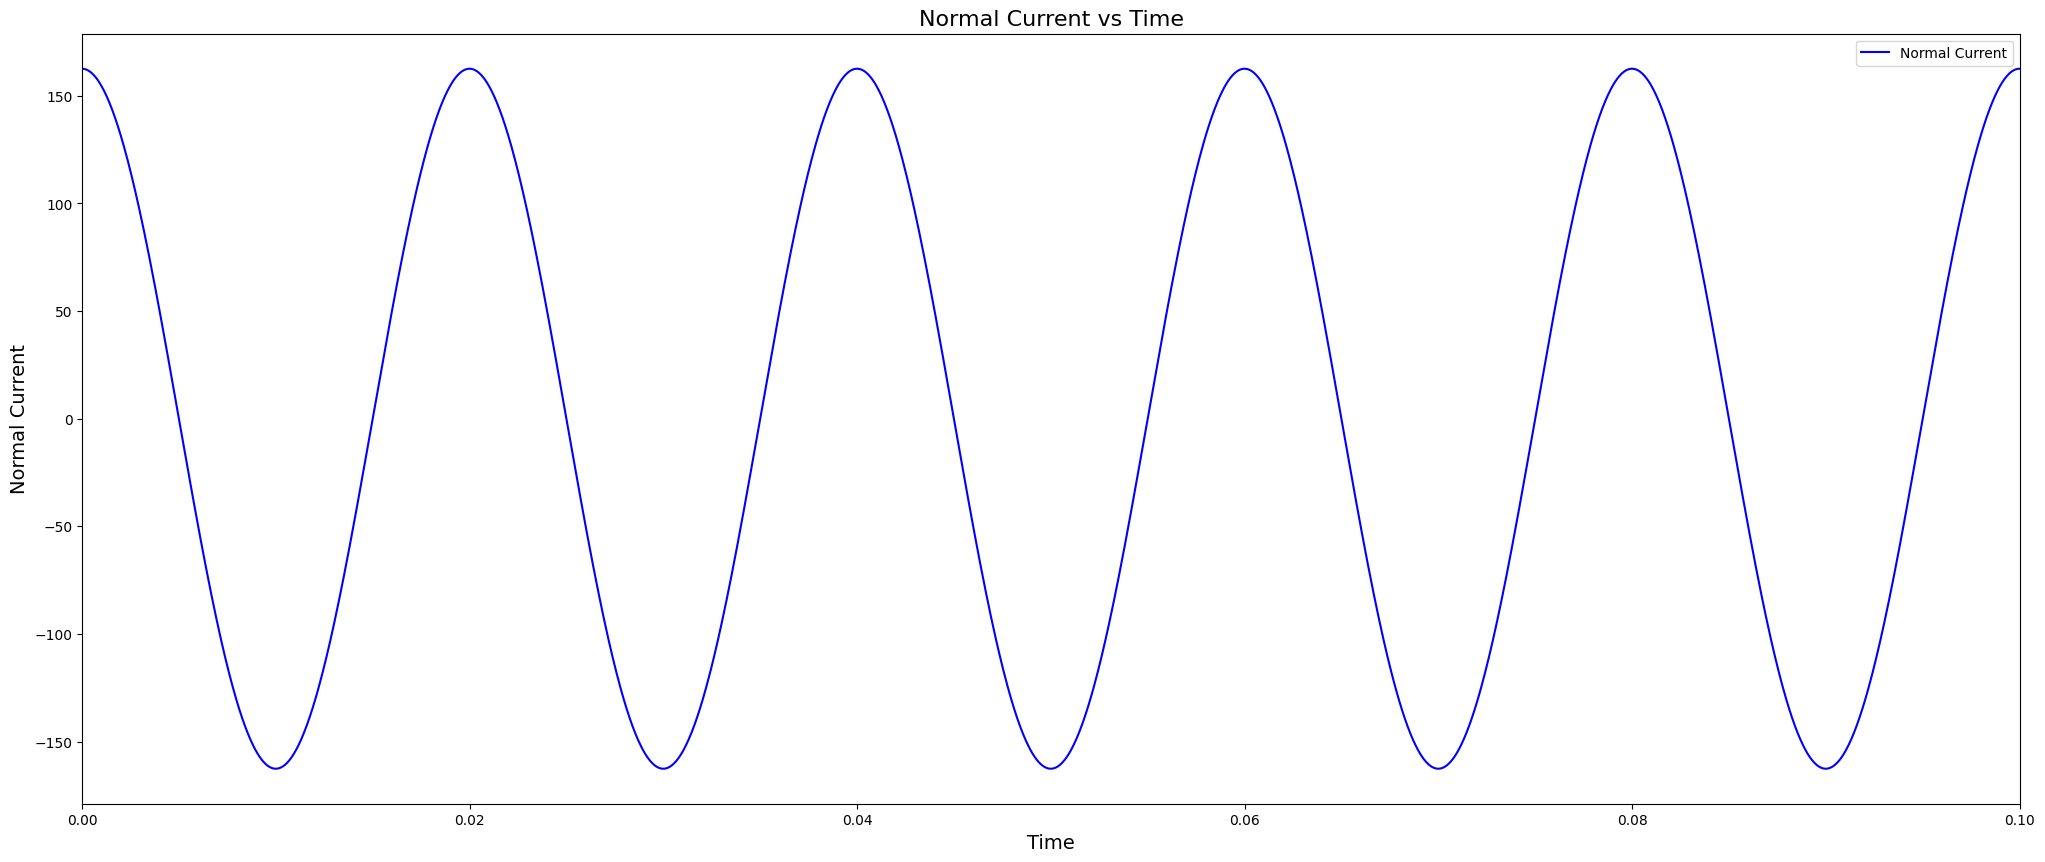

In [ ]:
# Plotting the normal current waveform with respect to time for the entire dataset

plt.figure(figsize=(25, 10))
plt.plot(df['Time'], df['Normal'], label='Normal Current', color='blue')

plt.xlabel('Time', fontsize=14)
plt.xlim(0, 0.1)
plt.ylabel('Normal Current', fontsize=14)
plt.title('Normal Current vs Time', fontsize=16)
plt.legend()


plt.show()

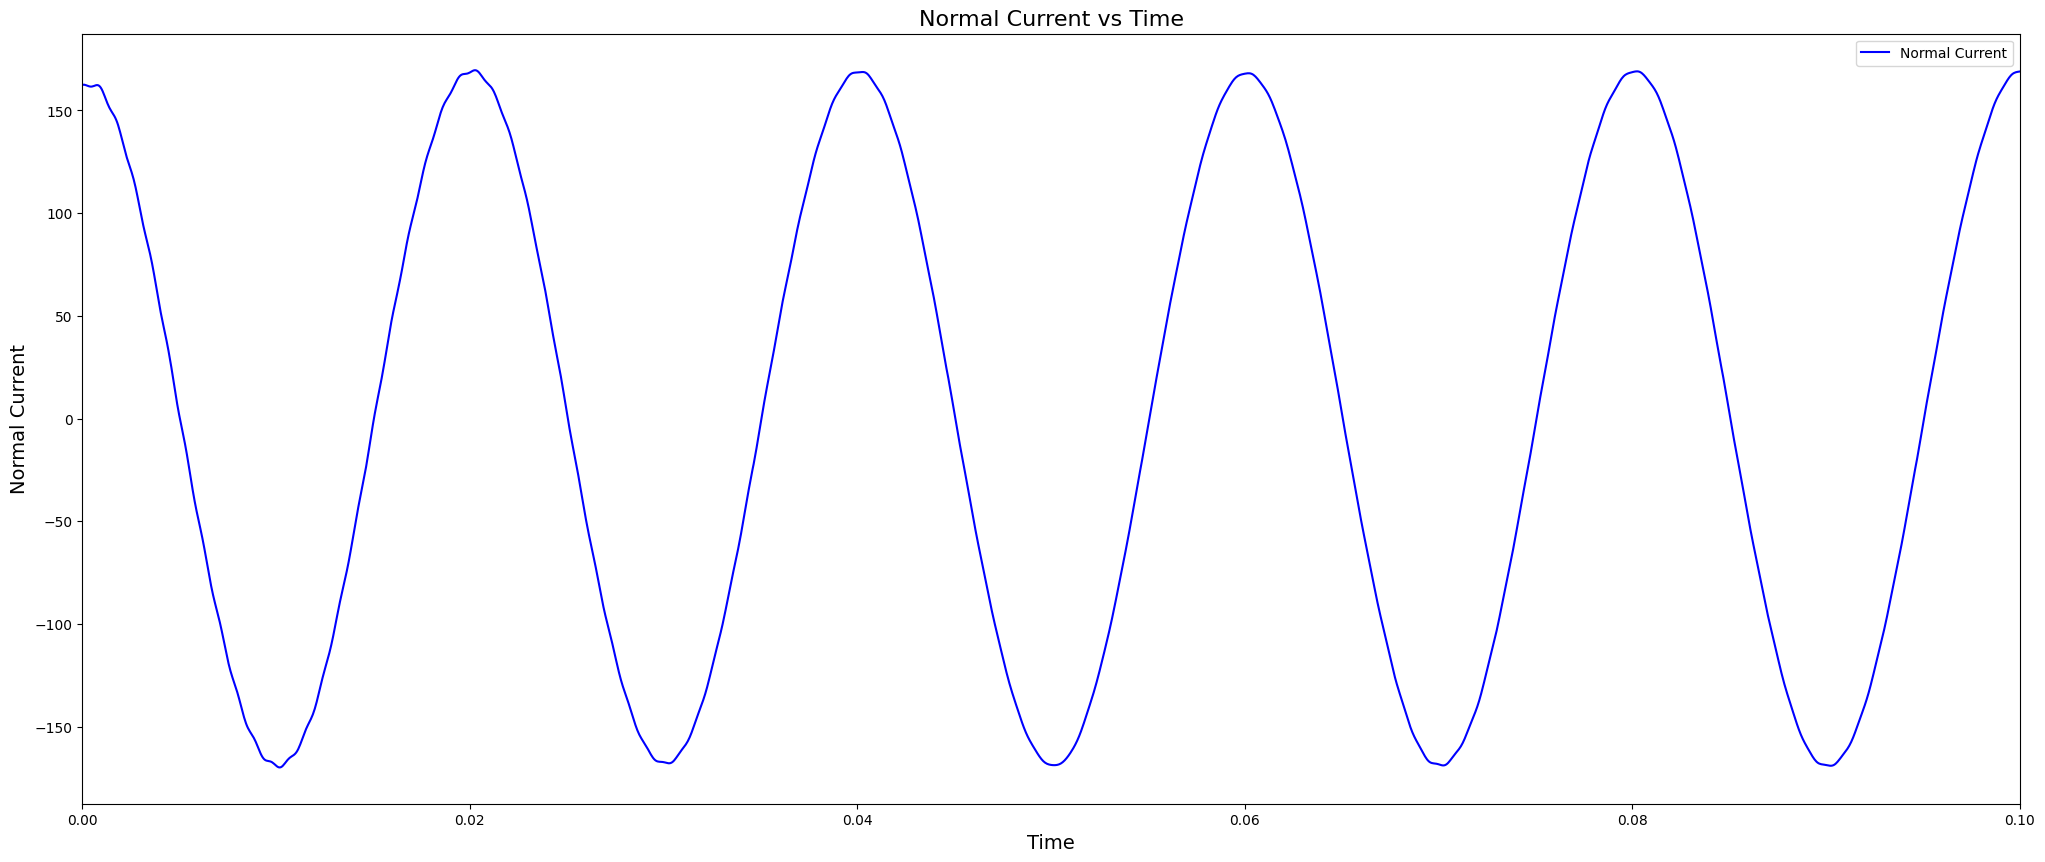

In [ ]:
# Plotting the fault current waveform with respect to time for the entire dataset

plt.figure(figsize=(25, 10))
plt.plot(df['Time'], df['Fault'], label='Normal Current', color='blue')

plt.xlabel('Time', fontsize=14)
plt.xlim(0, 0.1)
plt.ylabel('Normal Current', fontsize=14)
plt.title('Normal Current vs Time', fontsize=16)
plt.legend()


plt.show()

- When we input an array to the wavelet packet API of the PyWavelet, it decomposes the input array into smaller packets cointaing information.
- This decomposition is hierarchical in nature.


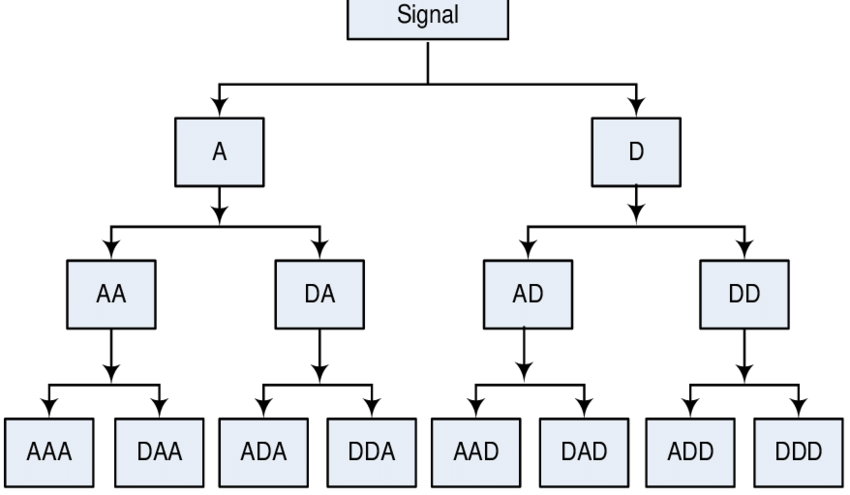

- Figue shows a 3-level wavelet package tree.

## Wavelet packets for Normal current data
- We are dividing the dataset into segments of 100 ms time.
- Wavelet packet analysis will be performed on these sets.

In [ ]:
normal_wavelet_packets = []
level = 3
for i, chunk in enumerate(chunks):
    wavelet_packet = pywt.WaveletPacket(data=chunk, wavelet='db4', mode='symmetric', maxlevel=3)
    normal_wavelet_packets.append(wavelet_packet)

In [ ]:
normal_wavelet_packets[0]['aaa'].data.shape

(256,)

In [ ]:
excel_data = []

for chunk_idx, chunk in enumerate(chunks):
    wavelet_packet = pywt.WaveletPacket(data=chunk, wavelet='db4', mode='symmetric', maxlevel=3)
    nodes = wavelet_packet.get_level(3, 'freq')

    for node_idx, node in enumerate(nodes):
        excel_data.append({
            "Chunk": chunk_idx + 1,
            "Node": node.path,
            "Data": node.data.tolist()
        })

df = pd.DataFrame(excel_data)

df_exploded = df.explode("Data")

output_file = "normal_wavelet_packet_data.xlsx"
df_exploded.to_excel(output_file, index=False)

## Wavelet packets for Fault current data

In [ ]:
df_normal = df_copy.copy()

In [ ]:
fault_current = df_normal["Fault"]

In [ ]:
chunk_size = 2000
chunks = [fault_current[i:i + chunk_size] for i in range(1, len(fault_current), chunk_size)]

In [ ]:
excel_data = []

for chunk_idx, chunk in enumerate(chunks):
    wavelet_packet = pywt.WaveletPacket(data=chunk, wavelet='db4', mode='symmetric', maxlevel=3)
    nodes = wavelet_packet.get_level(3, 'freq')

    for node_idx, node in enumerate(nodes):
        excel_data.append({
            "Chunk": chunk_idx + 1,
            "Node": node.path,
            "Data": node.data.tolist()
        })

df = pd.DataFrame(excel_data)

df_exploded = df.explode("Data")

output_file = "fault_wavelet_packet_data.xlsx"
df_exploded.to_excel(output_file, index=False)

## Data Analysis

First, lets create a copy of our dataset so we don't modify the orignal one

In [ ]:
df_normal_data_analysis = df_copy.copy()
df_fault_data_analysis = df_copy.copy()

## Approach

Our end goal is to create a dataFrame which can give us the statistical analysis of each of our node that we generated in our previous step.
For this, first we will need to prepare our data in a format which is  more convienient to work with
To achieve this, we will create 3 functions
- *chunk_data* : This function appends our data in a specific format in a list named 'excel_data'
- *create_exceldata* : This function is used to generate wavelet coeffecients for our data and then use *chunk_data* function to append this data in our list
- *create_dataframe* : This functions is creates our final dataframe with the help of above 2 functions


After creation of a dataframe in a desired format, we will find statistical parameters like mean , mode , variance etc for Fault as well as Normal Current

## Normal Current Wavelet Packet Statistical Analysis




In [ ]:
normal_current = df_normal_data_analysis['Normal']

chunk_size = 2000
chunks = [normal_current[i:i + chunk_size] for i in range(1, len(normal_current), chunk_size)]

In [ ]:
def chunk_data(excel_data ,nodes, chunk_idx):
        for node_idx, node in enumerate(nodes):
            excel_data.append({
                "Chunk": chunk_idx + 1,
                "Node": node.path,
                "Data": node.data.tolist()
              })

In [ ]:
def create_exceldata(n, excel_data):

    for chunk_idx, chunk in enumerate(chunks):
        wavelet_packet = pywt.WaveletPacket(data=chunk, wavelet='db4', mode='symmetric', maxlevel=3)
        counter = 1
        while (counter <= n):
            nodes = wavelet_packet.get_level(counter, 'freq')
            chunk_data(excel_data ,nodes , chunk_idx)
            counter = counter+1




In [ ]:
def create_dataframe(m):
    excel_data = []

    create_exceldata(m, excel_data)
    df = pd.DataFrame(excel_data)
    return df


In [ ]:
data = create_dataframe(3).explode("Data")
data.head(50000)

,Chunk,Node,Data
0,1,a,229.100576
0,1,a,229.583638
0,1,a,229.83959
0,1,a,229.738609
0,1,a,229.367732
...,...,...,...
113,9,d,-0.000005
113,9,d,-0.000005
113,9,d,-0.000005
113,9,d,-0.000005


In [ ]:
def total_levels(n):
    sum = 0
    while(n>=1):
        sum = sum + pow(2,n)
        n = n-1
    return sum

total_levels_in_a_chunk = total_levels(level)

In [ ]:
def generate_strings(n):
    patterns = []

    def backtrack(current_pattern, lvl):
        if len(current_pattern) == lvl:
            patterns.append(current_pattern)
            return

        backtrack("a" + current_pattern, lvl)
        backtrack("d" + current_pattern, lvl)

    backtrack("", n)  # Use n here, not a fixed 3
    return patterns

def generate_patterns(n):
    a = 1
    res = []
    while(n>=a):
        str = generate_strings(a)
        a = a+1

        res= res+str

    return res


patterns = generate_patterns(level)
patterns

['a',
 'd',
 'aa',
 'da',
 'ad',
 'dd',
 'aaa',
 'daa',
 'ada',
 'dda',
 'aad',
 'dad',
 'add',
 'ddd']

In [ ]:

def give_current_stats(data_frame, no_of_chunks, patterns):
    current_stats = []
    # this loop will traverse through all of the chunk 1 -> 200
    for i in range(1, int(no_of_chunks) + 1):
        data_of_each_chunk = data_frame[data_frame["Chunk"] == i]
        # this loop will traverse through all the levels of a particular chunk
        for j in range(0, total_levels_in_a_chunk):
            data_for_each_pattern = data_of_each_chunk[data_of_each_chunk["Node"] == patterns[j]]

            min_val = data_for_each_pattern["Data"].min()
            max_val = data_for_each_pattern["Data"].max()
            range_val = max_val - min_val
            mean_val = data_for_each_pattern["Data"].mean()
            median_val = data_for_each_pattern["Data"].median()

            # Handle mode correctly (take the first if multiple exist)
            mode_val = data_for_each_pattern["Data"].mode()
            if not mode_val.empty:  # Check if mode is not empty.
                mode_val = mode_val.iloc[0] # Take the first mode if it exists
            else:
                mode_val = None # Or some other appropriate value for "no mode"

            variance_val = data_for_each_pattern["Data"].var()
            standar_deviation_val = data_for_each_pattern["Data"].std()
            q25 = data_for_each_pattern["Data"].quantile(0.25)
            q75 = data_for_each_pattern["Data"].quantile(0.75)
            iqr_val = q75 - q25
            mad_val = np.mean(np.abs(data_for_each_pattern["Data"] - mean_val))  # Correct MAD calculation

            percentile_25 = data_for_each_pattern["Data"].quantile(0.25)
            percentile_50 = data_for_each_pattern["Data"].quantile(0.50)
            percentile_75 = data_for_each_pattern["Data"].quantile(0.75)
            percentile_90 = data_for_each_pattern["Data"].quantile(0.90)
            skewness_val = data_for_each_pattern["Data"].skew()
            kurtosis_val = data_for_each_pattern["Data"].kurt()

            summary_stats = {
                "Chunk": i,
                "Node": patterns[j],
                "min": min_val,
                "max": max_val,
                "range": range_val,
                "mean": mean_val,
                "median": median_val,
                "mode": mode_val,
                "variance": variance_val,
                "std_dev": standar_deviation_val,
                "iqr": iqr_val,
                "mad": mad_val,
                "percentile_25": percentile_25,
                "percentile_50": percentile_50,
                "percentile_75": percentile_75,
                "percentile_90": percentile_90,
                "skewness": skewness_val,
                "kurtosis": kurtosis_val,
            }

            current_stats.append(summary_stats)

    return current_stats

In [ ]:
res_normal = give_current_stats(data , 200 , patterns)

In [ ]:
res_normal_analysis =  pd.DataFrame(res_normal , columns=['Chunk', 'Node', 'min', 'max', 'range', 'mean', 'median', 'mode', 'variance', 'std_dev', 'iqr', 'mad', 'percentile_25', 'percentile_50', 'percentile_75', 'percentile_90', 'skewness', 'kurtosis'])

In [ ]:
res_normal_analysis.head(20)

,Chunk,Node,min,max,range,mean,median,mode,variance,std_dev,iqr,mad,percentile_25,percentile_50,percentile_75,percentile_90,skewness,kurtosis
0,1,a,-229.881197,229.881456,459.762653,6.865184e-01,9.742704e-01,-229.881197,2.652766e+04,162.873151,3.251011e+02,146.591344,-1.618616e+02,9.742704e-01,1.632395e+02,2.189311e+02,-0.004275,-1.503006
1,1,d,-0.001988,0.001979,0.003967,-1.605070e-08,4.246775e-08,-0.001988,1.208845e-08,0.000110,7.321677e-06,0.000011,-3.643401e-06,4.246775e-08,3.678276e-06,4.905429e-06,-0.136242,247.984633
2,1,aa,-324.985489,325.134704,650.120193,3.214342e+00,8.778268e+00,-324.985489,5.346212e+04,231.218781,4.597621e+02,208.132670,-2.288669e+02,8.778268e+00,2.308952e+02,3.117931e+02,-0.014305,-1.507871
3,1,da,-0.001615,0.000800,0.002415,-1.692243e-06,1.859599e-07,-0.001615,1.084072e-08,0.000104,1.034041e-05,0.000016,-5.129262e-06,1.859599e-07,5.211148e-06,6.990949e-06,-8.018577,152.250147
4,1,ad,-0.070952,0.060374,0.131326,5.434673e-05,2.041638e-06,-0.070952,2.705649e-05,0.005202,1.660821e-04,0.000622,-8.108586e-05,2.041638e-06,8.499619e-05,1.114353e-04,-0.278502,127.889519
5,1,dd,-0.001775,0.002295,0.004070,4.907296e-06,4.809700e-11,-0.001775,2.766366e-08,0.000166,5.894633e-09,0.000022,-2.869952e-09,4.809700e-11,3.024681e-09,1.445911e-08,5.865991,139.334089
6,1,aaa,-459.603447,459.992667,919.596114,1.076161e+01,1.663894e+01,-459.603447,1.084646e+05,329.339660,6.700730e+02,296.432445,-3.266548e+02,1.663894e+01,3.434182e+02,4.451642e+02,-0.034571,-1.516947
7,1,daa,-0.001261,0.000673,0.001934,-5.996870e-06,3.846331e-07,-0.001261,1.420114e-08,0.000119,1.484893e-05,0.000027,-7.131632e-06,3.846331e-07,7.717299e-06,9.978945e-06,-5.052311,61.244343
8,1,ada,-0.016929,0.063226,0.080155,1.375056e-04,2.183985e-06,-0.016929,1.811531e-05,0.004256,2.371534e-04,0.000621,-1.133139e-04,2.183985e-06,1.238395e-04,1.608620e-04,12.540583,192.131271
9,1,dda,-0.000291,0.001397,0.001688,1.336665e-05,5.812494e-11,-0.000291,1.901669e-08,0.000138,7.080354e-09,0.000031,-3.755998e-09,5.812494e-11,3.324356e-09,1.782171e-08,8.682667,79.996029


## Fault Current Wavelet Packet Statistical Analysis

In [ ]:
fault_current = df_fault_data_analysis['Fault']

chunk_size = 2000
chunks = [fault_current[i:i + chunk_size] for i in range(1, len(fault_current), chunk_size)]

In [ ]:
data = create_dataframe(3).explode("Data")
data.head(50000)

,Chunk,Node,Data
0,1,a,229.237463
0,1,a,229.75024
0,1,a,229.836764
0,1,a,229.863545
0,1,a,229.490478
...,...,...,...
113,9,d,0.00043
113,9,d,-0.000504
113,9,d,-0.001127
113,9,d,-0.000952


In [ ]:
res_faults = give_current_stats(data , 200 , patterns)

In [ ]:
res_fault_analysis =  pd.DataFrame(res_faults , columns=['Chunk', 'Node', 'min', 'max', 'range', 'mean', 'median', 'mode', 'variance', 'std_dev', 'iqr', 'mad', 'percentile_25', 'percentile_50', 'percentile_75', 'percentile_90', 'skewness', 'kurtosis'])

In [ ]:
res_fault_analysis.head(20)

,Chunk,Node,min,max,range,mean,median,mode,variance,std_dev,iqr,mad,percentile_25,percentile_50,percentile_75,percentile_90,skewness,kurtosis
0,1,a,-240.264081,239.832466,480.096547,0.482634,2.539862,-240.264081,28575.466831,169.042796,338.200103,152.241810,-168.806417,2.539862,169.393686,226.740152,-0.005889,-1.505026
1,1,d,-0.107327,0.107392,0.214718,-0.000502,-0.000101,-0.107327,0.000168,0.012966,0.004463,0.004693,-0.002290,-0.000101,0.002173,0.004123,-0.979258,43.534065
2,1,aa,-339.433533,339.191788,678.625321,2.947956,5.090924,-339.433533,57547.762774,239.891148,477.772369,216.046886,-232.542670,5.090924,245.229699,322.580067,-0.016597,-1.510358
3,1,da,-0.074780,0.071263,0.146043,-0.000740,0.000042,-0.074780,0.000157,0.012535,0.006542,0.006118,-0.003276,0.000042,0.003266,0.006569,-1.044151,19.064086
4,1,ad,-0.168018,0.181908,0.349926,0.000788,-0.002079,-0.168018,0.004051,0.063644,0.086129,0.051508,-0.043053,-0.002079,0.043076,0.082605,0.064281,-0.157629
5,1,dd,-0.085640,0.085037,0.170677,-0.000473,0.000009,-0.085640,0.000178,0.013344,0.000544,0.003634,-0.000260,0.000009,0.000283,0.000667,-0.795607,29.080223
6,1,aaa,-478.133101,479.282279,957.415381,10.445603,7.141162,-478.133101,116595.088908,341.460230,693.319120,307.463227,-328.418213,7.141162,364.900908,457.012751,-0.038085,-1.520130
7,1,daa,-0.058482,0.045419,0.103900,-0.001138,-0.000440,-0.058482,0.000140,0.011817,0.008792,0.007340,-0.004849,-0.000440,0.003943,0.008241,-0.603303,6.937405
8,1,ada,-0.181513,0.172697,0.354210,0.000961,0.000937,-0.181513,0.005061,0.071142,0.098781,0.057977,-0.046474,0.000937,0.052308,0.083252,-0.003667,-0.249394
9,1,dda,-0.079703,0.079318,0.159021,-0.000631,-0.000014,-0.079703,0.000260,0.016136,0.000909,0.005508,-0.000469,-0.000014,0.000440,0.004016,-0.484153,18.202564


In [ ]:
res_normal_analysis.to_excel("./normal_current_analysis.xlsx", index=False)
res_fault_analysis.to_excel("./fault_current_analysis.xlsx" , index=False)

In [ ]:
features_arr = res_normal_analysis.columns[2:]
features_arr = features_arr.to_list()
features_arr

['min',
 'max',
 'range',
 'mean',
 'median',
 'mode',
 'variance',
 'std_dev',
 'iqr',
 'mad',
 'percentile_25',
 'percentile_50',
 'percentile_75',
 'percentile_90',
 'skewness',
 'kurtosis']

In [ ]:
len(features_arr)

16

In [ ]:
mtlb_data = []
# traversing each chunk
for i in range(1, int(no_of_chunks+1) ):
    df_per_chunk = res_normal_analysis[res_normal_analysis["Chunk"] == i]
    data_per_row = []
    stats = {}
    stats["Chunk"] = i
    for j in range(0 , len(features_arr) ):
        df_per_feature = df_per_chunk[[features_arr[j] ,"Node"]]
        pattern_data = []

        for k in range(0 , len(patterns)):
            # print(df_per_feature[df_per_feature["Node"] == patterns[k]][features_arr[j]])
            data_per_pattern = df_per_feature[df_per_feature["Node"] == patterns[k]][features_arr[j]]
            # print("pattern" ,patterns[k], data_per_pattern.iloc[0])
            pattern_data.append(data_per_pattern.iloc[0])

        stats[features_arr[j]] = pattern_data

    mtlb_data.append(stats)


for i in range(1, int(no_of_chunks+1) ):
    df_per_chunk = res_fault_analysis[res_fault_analysis["Chunk"] == i]
    data_per_row = []
    stats = {}
    stats["Chunk"] = i
    for j in range(0 , len(features_arr) ):
        df_per_feature = df_per_chunk[[features_arr[j] ,"Node"]]
        pattern_data = []

        for k in range(0 , len(patterns)):
            # print(df_per_feature[df_per_feature["Node"] == patterns[k]][features_arr[j]])
            data_per_pattern = df_per_feature[df_per_feature["Node"] == patterns[k]][features_arr[j]]
            # print("pattern" ,patterns[k], data_per_pattern.iloc[0])
            pattern_data.append(data_per_pattern.iloc[0])

        stats[features_arr[j]] = pattern_data

    mtlb_data.append(stats)



mtlb_df =  pd.DataFrame(mtlb_data, columns=['Chunk',  'min', 'max', 'range', 'mean', 'median', 'mode', 'variance', 'std_dev', 'iqr', 'mad', 'percentile_25', 'percentile_50', 'percentile_75', 'percentile_90', 'skewness', 'kurtosis'])
mtlb_df.to_excel("./dataAnalysis.xlsx", index=False)

In [ ]:
mtlb_df

,Chunk,min,max,range,mean,median,mode,variance,std_dev,iqr,mad,percentile_25,percentile_50,percentile_75,percentile_90,skewness,kurtosis
0,1,"[-229.88119731448597, -0.001987828450774831, -...","[229.88145574342948, 0.0019787704364322423, 32...","[459.7626530579155, 0.003966598887207073, 650....","[0.686518406974737, -1.6050696638988746e-08, 3...","[0.9742704496943417, 4.2467753043340384e-08, 8...","[-229.88119731448597, -0.001987828450774831, -...","[26527.663230610422, 1.2088452079973402e-08, 5...","[162.87315073581163, 0.0001099474969245476, 23...","[325.1011322518149, 7.321676891658413e-06, 459...","[146.59134354595554, 1.1187888120397777e-05, 2...","[-161.86164528978543, -3.643400837138877e-06, ...","[0.9742704496943417, 4.2467753043340384e-08, 8...","[163.23948696202947, 3.678276054519536e-06, 23...","[218.93111070479947, 4.905429479107326e-06, 31...","[-0.004275342310448664, -0.13624225353638716, ...","[-1.5030063257888164, 247.98463345651084, -1.5..."
1,2,"[-229.88118578592258, -0.0019878143411247162, ...","[229.88145568060514, 0.0019774927119131647, 32...","[459.7626414665277, 0.003965307053037881, 650....","[0.6864874795433901, -1.5473224596326006e-08, ...","[0.9742723593371287, 3.893129671417306e-08, 8....","[-229.88118578592258, -0.0019878143411247162, ...","[26527.652710045208, 1.2077776103947004e-08, 5...","[162.8731184390021, 0.00010989893586357878, 23...","[325.10112873981404, 7.318220565655231e-06, 45...","[146.59131741915832, 1.1183572647079994e-05, 2...","[-161.86164194939573, -3.632017362531492e-06, ...","[0.9742723593371287, 3.893129671417306e-08, 8....","[163.2394867904183, 3.686203203123739e-06, 230...","[218.93111055543625, 4.932989426320589e-06, 31...","[-0.004275593856599727, -0.14074602903202452, ...","[-1.50300647762668, 248.05418227793115, -1.507..."
2,3,"[-229.881185964217, -0.0019878144692666577, -3...","[229.88145539140513, 0.0019774762237159127, 32...","[459.7626413556221, 0.00396529069298257, 650.1...","[0.6864871866265738, -1.5471297126534694e-08, ...","[0.9742720699355957, 3.8974071331354665e-08, 8...","[-229.881185964217, -0.0019878144692666577, -3...","[26527.65271142024, 1.207767584090485e-08, 534...","[162.8731184432233, 0.00010989847970242741, 23...","[325.1011286275457, 7.317349450364219e-06, 459...","[146.59131742421167, 1.1183546715942955e-05, 2...","[-161.8616421140585, -3.631117118430005e-06, -...","[0.9742720699355957, 3.8974071331354665e-08, 8...","[163.23948651348718, 3.686232331934214e-06, 23...","[218.9311103023316, 4.9329477691095745e-06, 31...","[-0.004275593802018401, -0.140848355762008, -0...","[-1.5030064775761487, 248.0542118991914, -1.50..."
3,4,"[-229.8811862555314, -0.001987814469442739, -3...","[229.88145510028488, 0.001977476326639138, 325...","[459.7626413558163, 0.003965290796081877, 650....","[0.6864868939341278, -1.5471358359706767e-08, ...","[0.974271778209838, 3.897420688958597e-08, 8.7...","[-229.8811862555314, 4.473443619534834e-06, -3...","[26527.65271141305, 1.2077676665997201e-08, 53...","[162.8731184432012, 0.00010989848345631163, 23...","[325.1011286270822, 7.3173464920639475e-06, 45...","[146.5913174241848, 1.1183546899345466e-05, 20...","[-161.8616424056703, -3.631114361746235e-06, -...","[0.974271778209838, 3.897420688958597e-08, 8.7...","[163.23948622141188, 3.6862321303177126e-06, 2...","[218.9311100103859, 4.932948093117062e-06, 311...","[-0.004275593802304978, -0.1408479537663436, -...","[-1.5030064775764131, 248.0542070165508, -1.50..."
4,5,"[-229.8811865437341, -0.0019878144685199217, -...","[229.88145481239928, 0.0019774763266460216, 32...","[459.7626413561334, 0.003965290795165943, 650....","[0.686486604457379, -1.547135778996685e-08, 3....","[0.9742714895318787, 3.897421976817306e-08, 8....","[-229.8811865437341, -0.0019878144685199217, -...","[26527.652711411643, 1.207767665871032e-08, 53...","[162.8731184431969, 0.00010989848342315885, 23...","[325.1011286266042, 7.317346608193276e-06, 459...","[146.5913174241825, 1.1183546889944632e-05, 20

In [ ]:
mtlb_flattened_data = []
# traversing each chunk
for i in range(1, int(no_of_chunks+1) ):
    df_per_chunk = res_normal_analysis[res_normal_analysis["Chunk"] == i]
    stats = {}
    stats["Chunk"] = i
    # per row operation
    # filling data for each row first
    for j in range(0 , len(features_arr) ):
        df_per_feature = df_per_chunk[[features_arr[j] ,"Node"]]
        for k in range(0 , len(patterns)):
            data_per_pattern = df_per_feature[df_per_feature["Node"] == patterns[k]][features_arr[j]]
            name_of_column = f"{features_arr[j]}_{patterns[k]}"
            stats[name_of_column] = data_per_pattern.iloc[0]
        # stats[features_arr[j]] = pattern_data

    mtlb_flattened_data.append(stats)

for i in range(1, int(no_of_chunks+1) ):
    df_per_chunk = res_fault_analysis[res_fault_analysis["Chunk"] == i]
    stats = {}
    stats["Chunk"] = i
    # per row operation
    # filling data for each row first
    for j in range(0 , len(features_arr) ):
        df_per_feature = df_per_chunk[[features_arr[j] ,"Node"]]
        # pattern_data = []

        for k in range(0 , len(patterns)):
            data_per_pattern = df_per_feature[df_per_feature["Node"] == patterns[k]][features_arr[j]]
            name_of_column = f"{features_arr[j]}_{patterns[k]}"
            stats[name_of_column] = data_per_pattern.iloc[0]
        # stats[features_arr[j]] = pattern_data

    mtlb_flattened_data.append(stats)



In [ ]:
columns_names = ["Chunk"]
for j in range(0 , len(features_arr) ):
    for k in range(0 , len(patterns)):
        name_of_column = f"{features_arr[j]}_{patterns[k]}"
        columns_names.append(name_of_column)

In [ ]:
columns_names

['Chunk',
 'min_a',
 'min_d',
 'min_aa',
 'min_da',
 'min_ad',
 'min_dd',
 'min_aaa',
 'min_daa',
 'min_ada',
 'min_dda',
 'min_aad',
 'min_dad',
 'min_add',
 'min_ddd',
 'max_a',
 'max_d',
 'max_aa',
 'max_da',
 'max_ad',
 'max_dd',
 'max_aaa',
 'max_daa',
 'max_ada',
 'max_dda',
 'max_aad',
 'max_dad',
 'max_add',
 'max_ddd',
 'range_a',
 'range_d',
 'range_aa',
 'range_da',
 'range_ad',
 'range_dd',
 'range_aaa',
 'range_daa',
 'range_ada',
 'range_dda',
 'range_aad',
 'range_dad',
 'range_add',
 'range_ddd',
 'mean_a',
 'mean_d',
 'mean_aa',
 'mean_da',
 'mean_ad',
 'mean_dd',
 'mean_aaa',
 'mean_daa',
 'mean_ada',
 'mean_dda',
 'mean_aad',
 'mean_dad',
 'mean_add',
 'mean_ddd',
 'median_a',
 'median_d',
 'median_aa',
 'median_da',
 'median_ad',
 'median_dd',
 'median_aaa',
 'median_daa',
 'median_ada',
 'median_dda',
 'median_aad',
 'median_dad',
 'median_add',
 'median_ddd',
 'mode_a',
 'mode_d',
 'mode_aa',
 'mode_da',
 'mode_ad',
 'mode_dd',
 'mode_aaa',
 'mode_daa',
 'mode_ada

In [ ]:
mtlb_flattened_df = pd.DataFrame(mtlb_flattened_data , columns=columns_names)


In [ ]:
mtlb_flattened_df

,Chunk,min_a,min_d,min_aa,min_da,min_ad,min_dd,min_aaa,min_daa,min_ada,...,kurtosis_ad,kurtosis_dd,kurtosis_aaa,kurtosis_daa,kurtosis_ada,kurtosis_dda,kurtosis_aad,kurtosis_dad,kurtosis_add,kurtosis_ddd
0,1,-229.881197,-0.001988,-324.985489,-0.001615,-0.070952,-0.001775,-459.603447,-0.001261,-0.016929,...,127.889519,139.334089,-1.516947,61.244343,192.131271,79.996029,86.090029,95.623911,76.829140,80.600741
1,2,-229.881186,-0.001988,-324.985477,-0.001613,-0.070914,-0.001774,-459.603436,-0.001261,-0.016922,...,127.854932,139.347257,-1.516948,61.351275,192.088958,79.989040,86.077268,95.572968,76.802882,80.620588
2,3,-229.881186,-0.001988,-324.985477,-0.001613,-0.070914,-0.001774,-459.603437,-0.001261,-0.016922,...,127.854836,139.347413,-1.516948,61.351807,192.088572,79.988945,86.077190,95.572410,76.802722,80.620809
3,4,-229.881186,-0.001988,-324.985478,-0.001613,-0.070914,-0.001774,-459.603437,-0.001261,-0.016922,...,127.854838,139.347412,-1.516948,61.351798,192.088575,79.988945,86.077190,95.572413,76.802724,80.620807
4,5,-229.881187,-0.001988,-324.985478,-0.001613,-0.070914,-0.001774,-459.603438,-0.001261,-0.016922,...,127.854838,139.347412,-1.516948,61.351798,192.088575,79.988945,86.077190,95.572413,76.802724,80.620807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,196,-239.714374,-0.064929,-339.003133,-0.042035,-0.134884,-0.052588,-479.019442,-0.020518,-0.087472,...,0.214439,42.092752,-1.517910,9.216077,-0.854989,33.094903,-1.002818,6.904536,3.308864,8.190294
396,197,-240.096823,-0.107358,-339.588013,-0.070629,-0.136033,-0.098732,-480.367601,-0.045285,-0.093190,...,-0.007270,27.484261,-1.518942,8.894317,-0.735572,13.998663,-0.947566,7.104228,2.731852,11.694889
397,198,-240.003029,-0.068236,-339.280110,-0.037255,-0.193138,-0.058764,-479.787829,-0.042490,-0.147725,...,4.019911,36.360651,-1.518233,10.148063,1.353726,27.981986,-0.827195,7.481557,5.208213,12.738299
398,199,-239.784815,-0.109856,-338.957510,-0.058305,-0.219241,-0.052346,-479.304463,-0.045208,-0.175435,...,3.241000,70.842214,-1.516748,10.397414,0.706002,29.874601,-1.058478,5.646677,2.116239,36.796730
